In [1]:
#importing libaries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np

In [2]:
x, y = make_classification(n_samples = 10000, n_features = 2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, random_state = 60)
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 42)

In [3]:
print(X_train)
len(y_test)

[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


2500

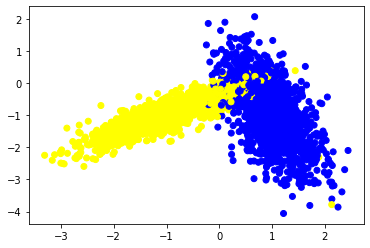

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
colors = {'yellow', 'blue'}
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = matplotlib.colors.ListedColormap(colors))
plt.show()

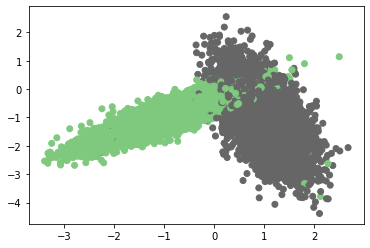

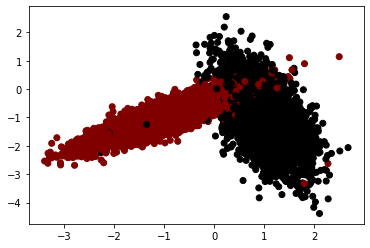

In [5]:
#different color varivations
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = "Accent_r")
plt.show()
plt.close()

colors = {'maroon', 'black'}
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = matplotlib.colors.ListedColormap(colors))
plt.show()

# Implementing Custom GridSearchCV

In [6]:
#it will take the classifier and the set of values for hyper prameter in dict type: dict({hyper parmeter: [list of values]}).
#implementing this only for KNN, the hyper parameter should be n_neighbors.
from sklearn.metrics import accuracy_score
def randomly_select_60_percent_indices_in_range_from_1_to_len(x_train):
    return random.sample(range(0, len(x_train)), int(0.6 * len(x_train)))

def GridSearch(x_train, y_train, classifier, params, folds):
    trainscores = []
    cvscores  = []    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        cvscores_folds  = []
        for j in range(0, folds):
            #referred from: https://stackoverflow.com/a/9755548/4084039
            train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(x_train)
            cv_indices  = list(set(list(range(1, len(x_train)))) - set(train_indices))

            #selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_cv  = x_train[cv_indices]
            Y_cv  = y_train[cv_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_cv)
            cvscores_folds.append(accuracy_score(Y_cv, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        cvscores.append(np.mean(np.array(cvscores_folds)))
    return trainscores, cvscores

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:08<00:00,  1.26it/s]


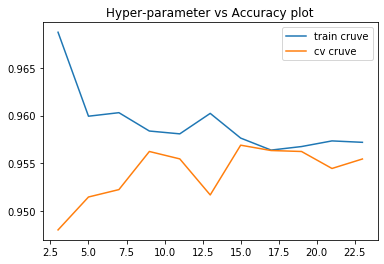

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]}
folds = 3

trainscores, cvscores = GridSearch(X_train, y_train, neigh, params, folds)
 
    
plt.plot(params['n_neighbors'], trainscores, label = 'train cruve')
plt.plot(params['n_neighbors'], cvscores, label = 'cv cruve')
plt.title('Hyper-parameter vs Accuracy plot')
plt.legend()
plt.show()

In the above plot, the point on the cv curve where it has maximum value while the difference between it and the train curve is minimum corresponds closest to 17. Hence, the best value of k is chosen to be 17.

In [9]:
#plotting decision boundry 
def plot_decision_boundary(X1, X2, y, clf):
        #creating color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    #plotting training points as well
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-class or binary classification (k = %i)" % (clf.n_neighbors))
    plt.show()

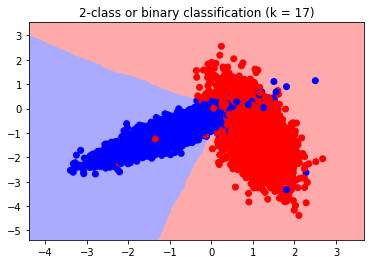

In [10]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 17)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)